<h1><center> MIE 1624 Assignment 1 </center></h1>

<h3><center> Anshul Verma, 1004730701 </center></h3>

Importing all the packadges used in the assignment

In [0]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np

Loading the provided data-set (data set in the same location as the .ipynb file)

In [92]:
df = pd.read_csv('Kaggle_Salary.csv')
#seeing all the columns
df.head() 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (73,77,114,146,153,171,175,212,224,228,231) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"250,000-299,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,-1,NaN,Coursera,edX,DataCamp,NaN,...,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"4,000-4,999",$0 (USD),NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,Other,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,-1,"60,000-69,999","$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RapidMiner,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,Auto-Keras,NaN,NaN,NaN,Na

Getting a warning because of the mixed data-type in certain columns

The Q10_buckets which is of major interest for the purpose of assignment is an ordered categorical data. It has been encoded in Q10_Encoded so I do not need to encode it and I can remove column Q10_buckets from the data-frame.

<h2> Q1. Data Cleaning</h2>

In [93]:
df.nunique() #15 different categories of salaries

Time from Start to Finish (seconds)    3282
Q1                                       11
Q2                                        4
Q2_OTHER_TEXT                            26
Q3                                       59
                                       ... 
Q34_Part_11                               1
Q34_Part_12                               1
Q34_OTHER_TEXT                          146
Q10_Encoded                              15
Q10_buckets                              15
Length: 248, dtype: int64

(12497, 248)


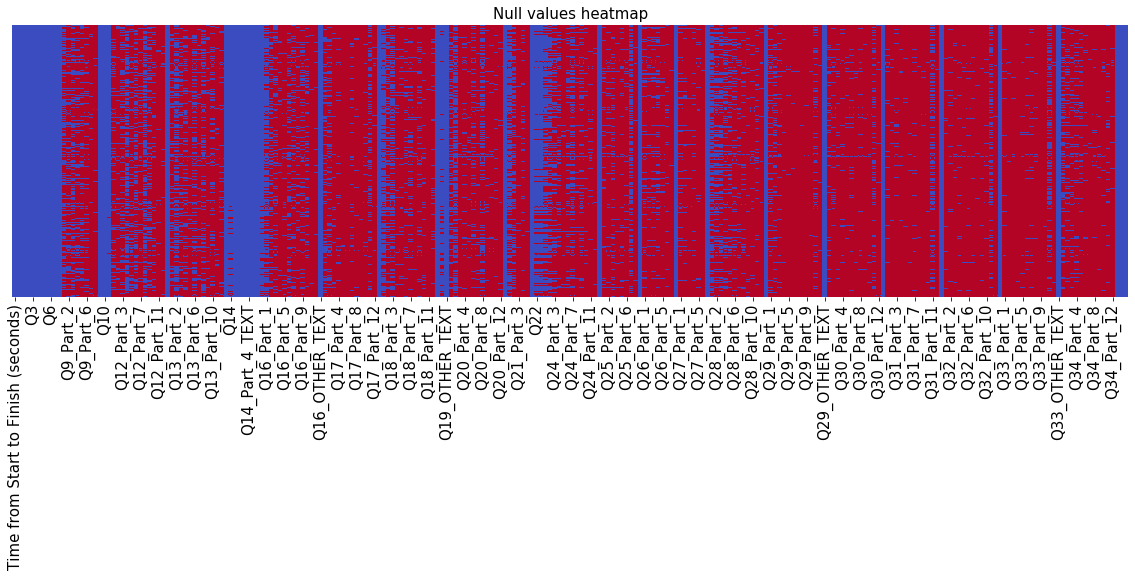

In [94]:
print(df.shape) #12,497 rows and 248 columns
plt.figure(figsize=(20,5))
fig = sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False)
plt.title('Null values heatmap')
plt.show()

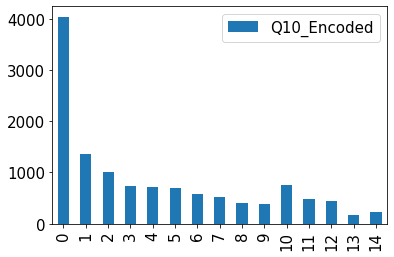

In [95]:
df_sal_grp = df['Q10_Encoded'].value_counts(sort = False).sort_index()
sal_plt = df_sal_grp.to_frame().plot.bar()

The data is not balanced and has far more enteries in the 0-encoded salary bucket (0 - 9,999$). Therefor while splitting and making test and validation set, I will need to ensure there is atleast some entry from each salary bucket.

In [96]:
#df.nunique(dropna = False)
count_df = df.nunique().to_frame(name = 'counts')
binary_idx = count_df.query('counts == 1')
binary_cols = binary_idx.index
binary_cols

Index(['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5',
       'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q12_Part_1', 'Q12_Part_2',
       ...
       'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7',
       'Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11',
       'Q34_Part_12'],
      dtype='object', length=202)

All these columns have one type of entry or are either blank. So these can easily be encoded into 0(blank) and 1(npt blank). All these columns are treated as a normal categorical data 

In [0]:
for col in binary_cols:
    entries = df[col].dropna().unique()
    #An array of length 1 with entries other than nan in binary columns of the dataframe
    if (len(entries) != 1):
        continue
    else:
        encodings = {col:{np.nan: 0, entries[0]:1}}
        #Encoding all these binary columns in a dataframe
        df.replace(encodings, inplace=True)

Now encoding the remaining columns of object datatype.  

In [98]:
object_dtype_cols = df.select_dtypes(include='object').columns
object_dtype_cols

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10', 'Q11', 'Q14',
       'Q15', 'Q19', 'Q22', 'Q23', 'Q10_buckets'],
      dtype='object')

Encoding Q1 which corresponds to age

In [99]:
#Just ensuring that none of the rows in that column has a nan value
df[object_dtype_cols[0]].isnull().values.any()

False

In [100]:
#Column Q1 corresponds to age range which is an ordered categorical data
age = df[object_dtype_cols[0]].value_counts()
ages_in_df = age.index
ages_in_df

Index(['25-29', '30-34', '35-39', '22-24', '40-44', '45-49', '50-54', '18-21',
       '55-59', '60-69', '70+'],
      dtype='object')

In [0]:
#Encoding age-groups
encodings = {object_dtype_cols[0]: {'18-21': 1, '22-24': 2, '25-29': 3, \
                    '30-34': 4, '35-39': 5, '40-44': 6, \
                    '45-49': 7, '50-54': 8, '55-59': 9, \
                    '60-69': 10, '70+': 11}}
df.replace(encodings, inplace=True)

Encoding Q2 which corresponds to gender

In [102]:
#Column Q2 corresponds to gender just enuring that there is no missing row in the column
df[object_dtype_cols[1]].isnull().values.any()

False

In [103]:
gender = df[object_dtype_cols[1]].value_counts()
genders = gender.index
genders

Index(['Male', 'Female', 'Prefer not to say', 'Prefer to self-describe'], dtype='object')

In [0]:
#Gender might not affect the salary hugely but its still better to keep the column and not drop it
#Joining the one-hot vectors for genders in the original dataframe this is a nominal categorical data
df = pd.concat([df, pd.get_dummies(df[object_dtype_cols[1]], prefix='sex')], axis=1)

In [0]:
#Dropping the original 'Q3' column 
df.drop([object_dtype_cols[1]], axis=1, inplace=True)

Encoding Q3 which corresponds to country

In [106]:
#Column Q3 corresponds to country just enuring that there is no missing row in the column
df[object_dtype_cols[2]].isnull().values.any()
#Since we are doing one-hot encoding it wont affect 

False

In [107]:
country = df[object_dtype_cols[2]].value_counts()
countries = country.index
countries

Index(['India', 'United States of America', 'Other', 'Brazil', 'Japan',
       'Russia', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Spain',
       'Canada', 'France', 'China', 'Nigeria', 'Australia', 'Italy', 'Turkey',
       'Taiwan', 'Poland', 'Ukraine', 'Mexico', 'Colombia', 'Pakistan',
       'Netherlands', 'South Korea', 'Indonesia', 'Singapore', 'Argentina',
       'Portugal', 'South Africa', 'Chile', 'Israel', 'Viet Nam',
       'Switzerland', 'Kenya', 'Greece', 'Morocco', 'Sweden', 'Egypt',
       'Bangladesh', 'Belgium', 'Iran, Islamic Republic of...', 'Peru',
       'Ireland', 'Hong Kong (S.A.R.)', 'Malaysia', 'Belarus',
       'Republic of Korea', 'Romania', 'Thailand', 'Austria', 'Hungary',
       'Philippines', 'Norway', 'New Zealand', 'Denmark', 'Czech Republic',
       'Saudi Arabia', 'Algeria', 'Tunisia'],
      dtype='object')

Countries can hugely affect the incomes therefore its very import to keep it in the data frame. Using one-hot encoding to encode top few countries in the dataset but before that putting every other country as others.

In [108]:
#Getting the list of top countries
value_mask = df[object_dtype_cols[2]].isin(country.index[country < 100])
df.loc[value_mask,'Q3'] = 'Other'
country = df[object_dtype_cols[2]].value_counts()
countries = country.index
countries

Index(['Other', 'India', 'United States of America', 'Brazil', 'Japan',
       'Russia', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Spain',
       'Canada', 'France', 'China', 'Nigeria', 'Australia', 'Italy', 'Turkey',
       'Taiwan', 'Poland', 'Ukraine', 'Mexico', 'Colombia', 'Pakistan',
       'Netherlands', 'South Korea', 'Indonesia', 'Singapore'],
      dtype='object')

In [0]:
#Joining the one-hot vectors for top countries in the original dataframe
df = pd.concat([df, pd.get_dummies(df[object_dtype_cols[2]], prefix='country')], axis=1)

In [0]:
#Dropping the original 'Q3' column 
df.drop([object_dtype_cols[2]], axis=1, inplace=True)

Encoding Q4 which corresponds to education level

In [111]:
#Column Q4 corresponds to education, just enuring that there is no missing row in the column
df[object_dtype_cols[3]].isnull().values.any()

False

In [112]:
#Filling the Nans with a default value of -1
df[object_dtype_cols[3]].fillna(-1, inplace = True)
df[object_dtype_cols[3]].isnull().values.any()

False

In [113]:
#Column Q4 corresponds to education level which can be treated as an ordinal categorical data
edu_level = df[object_dtype_cols[3]].value_counts()
education_levels = edu_level.index
education_levels

Index(['Master’s degree', 'Bachelor’s degree', 'Doctoral degree',
       'Professional degree',
       'Some college/university study without earning a bachelor’s degree',
       'I prefer not to answer', 'No formal education past high school'],
      dtype='object')

In [0]:
#Roughly using number of years to encode the education level
encodings = {object_dtype_cols[3]: {'Master’s degree': 6, 'Bachelor’s degree': 4, 'Doctoral degree':10,\
                                    'Professional degree':5, 'Some college/university study without earning a bachelor’s degree':2,\
                                    'I prefer not to answer':0, 'No formal education past high school':1}}
df.replace(encodings, inplace=True)

Encoding Q5 which corresponds to job-position

In [115]:
#Column Q5 corresponds to job-position, just enuring that there is no missing row in the column
df[object_dtype_cols[4]].isnull().values.any()
#One-hot encoding this wont affect

False

In [116]:
#Column Q5 corresponds to job-position which can be treated as an normal categorical data
job_positions = df[object_dtype_cols[4]].value_counts()
positions = job_positions.index
positions

Index(['Data Scientist', 'Software Engineer', 'Other', 'Data Analyst',
       'Research Scientist', 'Business Analyst', 'Product/Project Manager',
       'Data Engineer', 'Statistician', 'DBA/Database Engineer'],
      dtype='object')

In [0]:
#Roughly encoding job-positions and keeping them but I do not expect it to be an important feature
#Joining the one-hot vectors for genders in the original dataframe this is a nominal categorical data
df = pd.concat([df, pd.get_dummies(df[object_dtype_cols[4]], prefix='position_')], axis=1)

In [0]:
#Dropping the original column
df.drop([object_dtype_cols[4]], axis=1, inplace=True)

Encoding Q6 which corresponds to the size of the company

In [119]:
#Column Q6 corresponds to # of employes, just enuring that there is no missing row in the column
df[object_dtype_cols[5]].isnull().values.any()

False

In [120]:
df[object_dtype_cols[5]].value_counts()

0-49 employees          3530
> 10,000 employees      2810
1000-9,999 employees    2418
50-249 employees        2088
250-999 employees       1651
Name: Q6, dtype: int64

In [121]:
df[object_dtype_cols[5]].fillna('0-49 employees', inplace = True) #Filling the missing fields with most common entry encoded
df[object_dtype_cols[5]].isnull().values.any()

False

In [122]:
#Column Q6 corresponds to # of employes which can be treated as an ordered categorical data
size = df[object_dtype_cols[5]].value_counts()
num_emp = size.index
num_emp

Index(['0-49 employees', '> 10,000 employees', '1000-9,999 employees',
       '50-249 employees', '250-999 employees'],
      dtype='object')

In [0]:
#Encoding # of employees in order
encodings = {object_dtype_cols[5]: {'0-49 employees': 0, '> 10,000 employees': 4, '1000-9,999 employees': 3,\
                                    '50-249 employees': 1, '250-999 employees': 2}}
df.replace(encodings, inplace=True)

Encoding Q7 which corresponds to the number of employes in for datascience

In [124]:
#Column Q7 corresponds to the number of employes for data-science just enuring that there is no missing row in the column
df[object_dtype_cols[6]].isnull().values.any()

False

In [125]:
df[object_dtype_cols[6]].value_counts()

20+      2896
1-2      2798
3-4      2137
0        1702
5-9      1688
10-14     891
15-19     385
Name: Q7, dtype: int64

In [126]:
#Filling the nan inputs with most common input
df[object_dtype_cols[6]].fillna('20+', inplace = True)
df[object_dtype_cols[6]].isnull().values.any()

False

In [127]:
#Column Q7 corresponds to the number of employes for data-science which can be treated as an ordered categorical data
size = df[object_dtype_cols[6]].value_counts()
num_emp = size.index
num_emp

Index(['20+', '1-2', '3-4', '0', '5-9', '10-14', '15-19'], dtype='object')

In [0]:
#Encoding years of experience in order this must be hugely correlated to the salary bucket
encodings = {object_dtype_cols[6]: {'20+': 6, '1-2': 1, '3-4': 2, '0': 0,\
                                    '5-9': 3, '10-14': 4, '15-19': 5}}
df.replace(encodings, inplace=True)

Encoding Q8 which corresponds to the use of ML-algorithms in their jobs

In [129]:
#Column Q7 corresponds to the extent of ML useage just enuring that there is no missing row in the column
df[object_dtype_cols[7]].isnull().values.any()

False

In [130]:
df[object_dtype_cols[7]].value_counts()

We are exploring ML methods (and may one day put a model into production)                    2636
We recently started using ML methods (i.e., models in production for less than 2 years)      2589
We have well established ML methods (i.e., models in production for more than 2 years)       2362
No (we do not use ML methods)                                                                2345
We use ML methods for generating insights (but do not put working models into production)    1448
I do not know                                                                                1117
Name: Q8, dtype: int64

In [131]:
#Using a -1 encoding for nan entries because the nan counts are a lot
df[object_dtype_cols[6]].fillna(-1, inplace = True)
df[object_dtype_cols[6]].isnull().values.any()

False

In [132]:
#Column Q8 corresponds to the extent of ML useage which can be treated as an ordered categorical data
ML_ext = df[object_dtype_cols[7]].value_counts()
ML = ML_ext.index
ML

Index(['We are exploring ML methods (and may one day put a model into production)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'No (we do not use ML methods)',
       'We use ML methods for generating insights (but do not put working models into production)',
       'I do not know'],
      dtype='object')

In [0]:
#Encoding use of ML in order this can be correlated to the salary bucket
encodings = {object_dtype_cols[7]: {'We are exploring ML methods (and may one day put a model into production)': 1,\
                                    'We recently started using ML methods (i.e., models in production for less than 2 years)': 3,\
                                    'We have well established ML methods (i.e., models in production for more than 2 years)': 4,\
                                    'No (we do not use ML methods)': -1,\
                                    'We use ML methods for generating insights (but do not put working models into production)': 2,\
                                    'I do not know': 0}}
df.replace(encodings, inplace=True)

Removing the original approximate salary entry column from the data-frame 

In [134]:
object_dtype_cols[8]

'Q10'

Q10 corresponds to the exact salary and is already encoded in Q10_encoded column so I do not need to encode this column and drop it from the dataset so that the trarget values do not get leaked into features

In [0]:
#Dropping the original 'Q10' column 
df.drop([object_dtype_cols[8]], axis=1, inplace=True)

Q11 corresponds to the approximate expenditure on cloud-computing and ML resources in past 5 years

In [136]:
#Making sure that the column has no nan entries
df[object_dtype_cols[9]].isnull().values.any()

True

In [137]:
#Since the column has some empty inputs I will replace those with -1
df[object_dtype_cols[9]].fillna(-1, inplace=True)
df[object_dtype_cols[9]].isnull().values.any()

False

In [138]:
#Column Q11 corresponds to the expenditure on cloud-computing and ML resources
#This can be treated as an ordered categorical data
expML_app = df[object_dtype_cols[9]].value_counts()
expML = expML_app.index
expML

Index([         '$0 (USD)',         '$100-$999',      '$1000-$9,999',
                  '$1-$99',   '$10,000-$99,999', '> $100,000 ($USD)',
                        -1],
      dtype='object')

In [0]:
#Encoding expenses of ML and cloud-computing in order this can be correlated to the salary bucket
encodings = {object_dtype_cols[9]: {'$0 (USD)': 0, '$100-$999': 2, '$1000-$9,999': 3,\
                                    '$1-$99': 1, '$10,000-$99,999': 4, '> $100,000 ($USD)': 5}}

df.replace(encodings, inplace=True)

Encoding Q14 which corresponds to the tools they use for data-analysis

In [140]:
#Just ensuring that the column does not have any nan entries
df[object_dtype_cols[10]].isnull().values.any()

True

In [141]:
#Finding the number of nan entries in the column
df[object_dtype_cols[10]].isnull().sum()

1045

Since the number of nan entries are significant I will leave it as it is and get_dummies will assign 0 to all the new columns generated by this existing column

In [142]:
#Column Q14 corresponds to the tools they use for data-analysis
#This can be treated as an general categorical data
tools = df[object_dtype_cols[10]].value_counts()
tool = tools.index
tool

Index(['Local development environments (RStudio, JupyterLab, etc.)',
       'Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)', 'Other',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       'Advanced statistical software (SPSS, SAS, etc.)'],
      dtype='object')

In [0]:
#Since its a general categorical data we will need to perform one-hot encoding for this column
#Joining the one-hot vectors for top countries in the original dataframe
df = pd.concat([df, pd.get_dummies(df[object_dtype_cols[10]], prefix='Q14')], axis=1)
cols = list(df)

In [0]:
#Droping the original Q14 column from the dataset
#Dropping the original 'Q3' column 
df.drop([object_dtype_cols[10]], axis=1, inplace=True)

Encoding Q15 which corresponds to data-analysis experience

In [145]:
#Just making sure that column does not have any nan enteries
df[object_dtype_cols[11]].isnull().values.any()

True

In [146]:
#Counting the number of nan entries in the column
df[object_dtype_cols[11]].isnull().sum()

1075

In [147]:
#Comparing it to the occurance of enteries in the column
df[object_dtype_cols[11]].value_counts()

3-5 years                    2818
1-2 years                    2713
< 1 years                    2049
5-10 years                   1749
10-20 years                  1004
I have never written code     552
20+ years                     537
Name: Q15, dtype: int64

In [148]:
#Since the number of nan entries are quite significant compare to any other entry in the column I will replace nan with -1
df[object_dtype_cols[11]].fillna(-1, inplace=True)
df[object_dtype_cols[11]].isnull().values.any()

False

In [149]:
#This can be seen an ordered categorical data
exp = df[object_dtype_cols[11]].value_counts()
exp_code = exp.index
exp_code

Index([                '3-5 years',                 '1-2 years',
                       '< 1 years',                '5-10 years',
                                -1,               '10-20 years',
       'I have never written code',                 '20+ years'],
      dtype='object')

In [0]:
#Using normal ordinal encodings for this column
encodings = {object_dtype_cols[11]: {'3-5 years': 3,'1-2 years': 2, '< 1 years': 1,\
                                     '5-10 years': 4, '10-20 years': 5, 'I have never written code': 0,\
                                     '20+ years': 6}}

df.replace(encodings, inplace=True)

In [151]:
#Ensuring that the encoded column does not have any nan entry
df[object_dtype_cols[11]].isnull().any()

False

Encoding Q19 which corresponds to a suggestion of the language of choice for a data-analyst aspirant

In [0]:
#Since this column is only a suggestion it will surely not affect the salary bucket of a person
#This might affect the final result 

#I will choose to drop this column because the question doesnt seem useful for the purpose
df.drop([object_dtype_cols[12]], axis=1, inplace=True)

Encoding Q22 which correspond to TPU usage

In [153]:
#Just making sure that column does not have any nan enteries
df[object_dtype_cols[13]].isnull().values.any()

True

In [154]:
#Counting the number of nan entries in the column
df[object_dtype_cols[13]].isnull().sum()

1947

In [155]:
#Since the column has almost all the input as Never
#I will assume the user who left it blank do not know about TPU and fill the nan with Never
df[object_dtype_cols[13]].fillna('Never', inplace=True)
print(df[object_dtype_cols[13]].value_counts())

Never         10459
Once            976
2-5 times       795
6-24 times      145
> 25 times      122
Name: Q22, dtype: int64


In [0]:
#Using normal ordinal encodings for this column
encodings = {object_dtype_cols[13]: {'Never': 0,'Once': 1, '2-5 times': 2,\
                                     '6-24 times': 3, '> 25 times': 4}}

df.replace(encodings, inplace=True)

Encoding Q23 which correspond to years of ML-experience

In [157]:
#Ensuring that there are no nan entries in the column
print(df[object_dtype_cols[14]].isnull().values.any())
#Counting the number of nan entries in the column
print(df[object_dtype_cols[14]].isnull().sum())
#Counting the enteries in the column
print(df[object_dtype_cols[14]].value_counts())
ML_exp = df[object_dtype_cols[14]].value_counts()
MLexp = ML_exp.index
MLexp

True
1956
< 1 years      3068
1-2 years      2727
2-3 years      1569
3-4 years       975
4-5 years       863
5-10 years      833
10-15 years     330
20+ years       176
Name: Q23, dtype: int64


Index(['< 1 years', '1-2 years', '2-3 years', '3-4 years', '4-5 years',
       '5-10 years', '10-15 years', '20+ years'],
      dtype='object')

In [0]:
#Since there is no option of a -1 (corresponding to 0-year experience) I am going to fill the nans with zeros
df[object_dtype_cols[14]].fillna(-1, inplace=True)

In [0]:
#Using an ordinal encoding
encodings = {object_dtype_cols[14]: {'< 1 years': 0, '1-2 years': 1, '2-3 years': 2,\
                                    '3-4 years': 3, '4-5 years': 4, '5-10 years': 5,\
                                    '10-15 years': 6, '20+ years': 7}}
df.replace(encodings, inplace=True)

Q10_buckets has already been encoded therefore I am droping the column from the data-frame

In [0]:
#I will choose to drop this column because the question doesnt seem useful for the purpose
df.drop([object_dtype_cols[15]], axis=1, inplace=True)

Just ensuring that there are no nan entries in the encoded dataframe

In [161]:
chk = df.isnull().sum()
print(chk.sum())
print(df.shape)
#Plotting heatmap for the null values

0
(12497, 287)


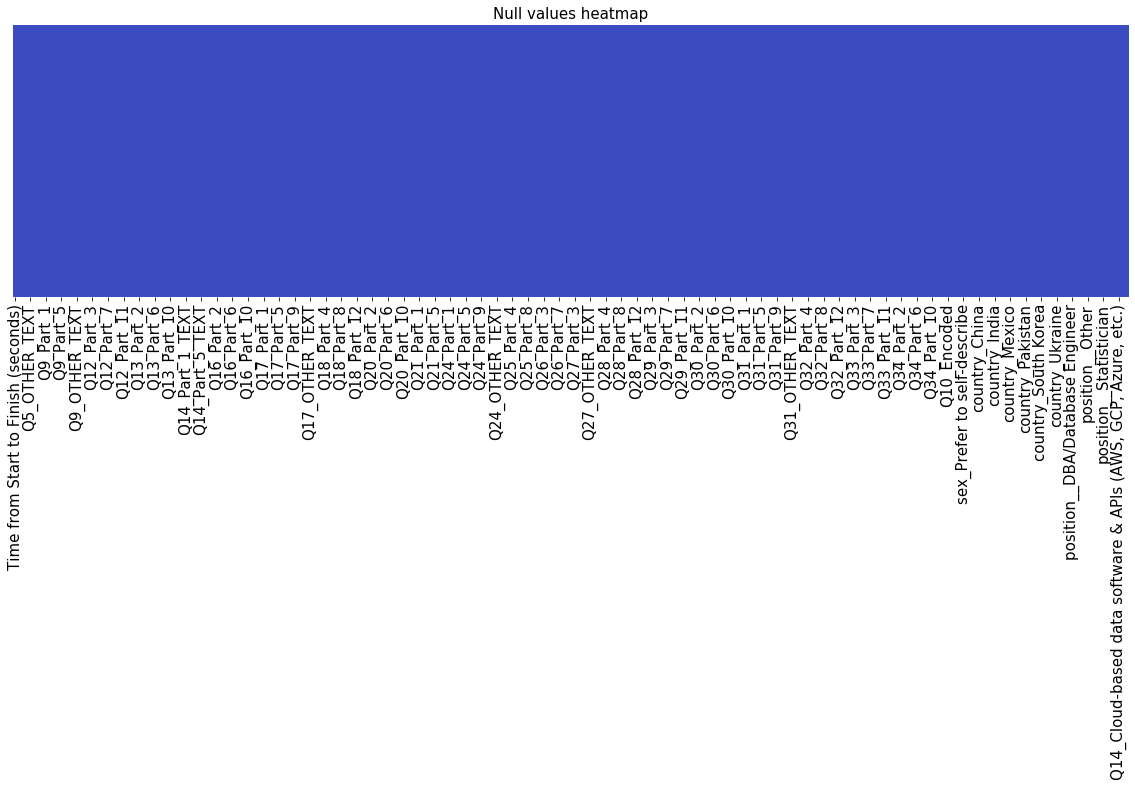

In [162]:
#Dropping the rows with these remaing nan values
df.dropna(axis=0, how='any')
#Checking again
chk = df.isnull().sum()
print(chk.sum())
#Plotting heatmap for the null values
plt.figure(figsize=(20,5))
fig = sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False)
plt.title('Null values heatmap')
plt.show()

There are no nan entries in the dataset

<h2> Q2. Exploratory data analysis</h2>

In [163]:
org_df = pd.read_csv('Kaggle_Salary.csv') #Copy of the original data-set

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (73,77,114,146,153,171,175,212,224,228,231) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


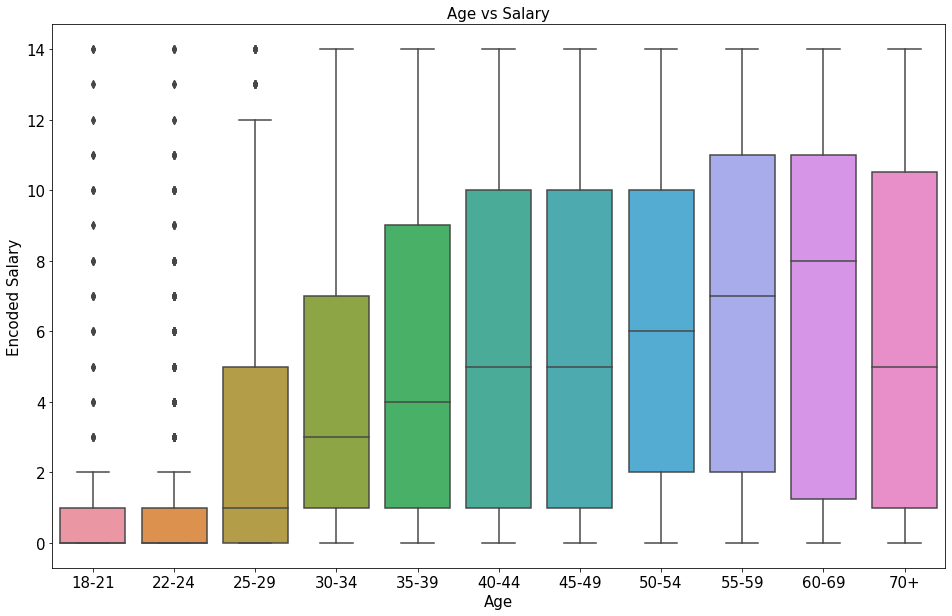

In [164]:
#There should be a clear trend in between age and salary compensation because older the person is more is his/her experience

#Visualizing to check this
plt.figure(figsize=(16,10))
order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
fig = sns.boxplot(org_df['Q1'], df['Q10_Encoded'], order = order)
fig.set(xlabel='Age', ylabel='Encoded Salary', title = 'Age vs Salary')
plt.show()

#This should also be true for ML-experience and salary-buckets, given the use of data-analytics


#Other columns like number of emplyes under someone will also determine their salary region 
#Even the size of company could be a factor

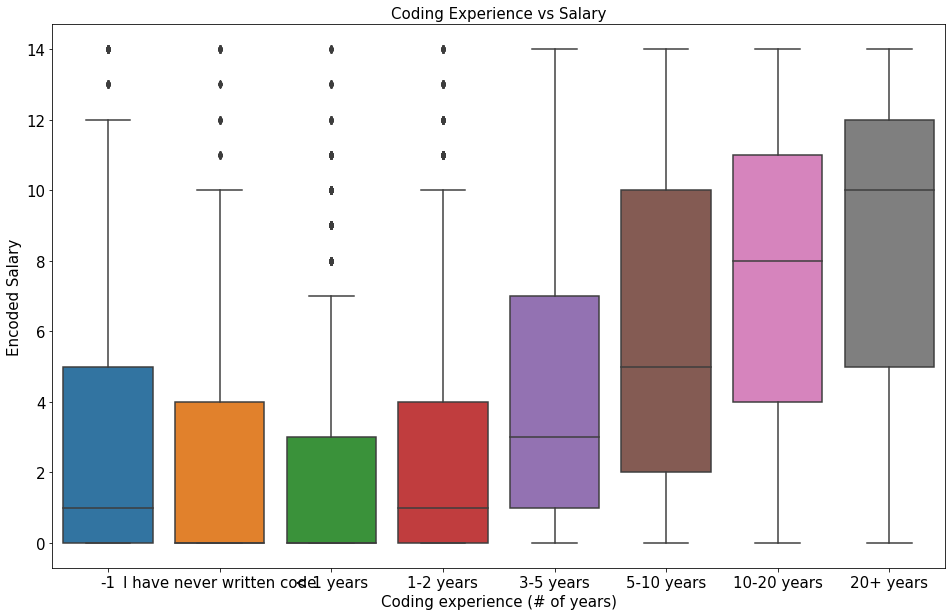

In [165]:
#Coding for data analysis experience and ML-experience should also affect salary buckets
#Coding for data-analysis experience
org_df['Q15'].fillna(-1, inplace=True)
plt.figure(figsize=(16,10))
order=[-1, 'I have never written code', '< 1 years', '1-2 years',\
       '3-5 years', '5-10 years', '10-20 years', '20+ years'] #-1 corresponds the nan inputs
fig = sns.boxplot(org_df['Q15'], org_df['Q10_Encoded'], order = order)
fig.set(xlabel='Coding experience (# of years)', ylabel='Encoded Salary', title = 'Coding Experience vs Salary')
plt.show()

It can be seen that people with more coding experience in the field are getting paid higher -1 is for NaN inputs in the field and people who have not written codes must be really good at mathematicians given they are having a job in this field 

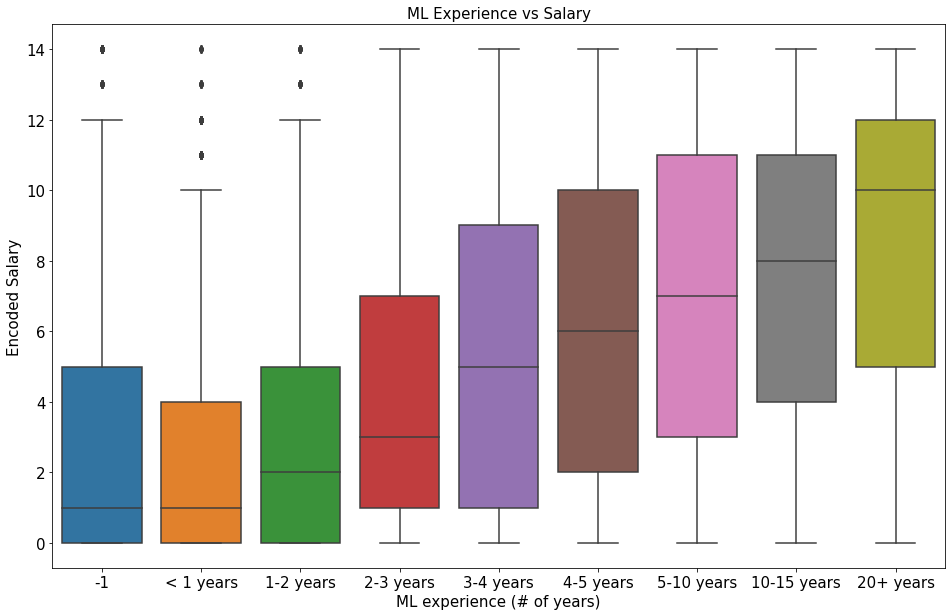

In [166]:
#ML Experience
#Encoding the NaN input fields
org_df['Q23'].fillna(-1, inplace=True)
plt.figure(figsize=(16,10))
order=[-1, '< 1 years', '1-2 years', '2-3 years', '3-4 years', '4-5 years',\
       '5-10 years', '10-15 years', '20+ years'] #-1 corresponds the nan inputs
fig = sns.boxplot(org_df['Q23'], org_df['Q10_Encoded'], order = order)
fig.set(xlabel='ML experience (# of years)', ylabel='Encoded Salary', title = 'ML Experience vs Salary')
plt.show()

It can be seen that people with more ML experience in the field are getting paid higher -1 is for NaN inputs in the field. Some other features can also be plotted like this to show their correlation with the salary.

Another exciting feature would be the highest level of education vs expected salary 

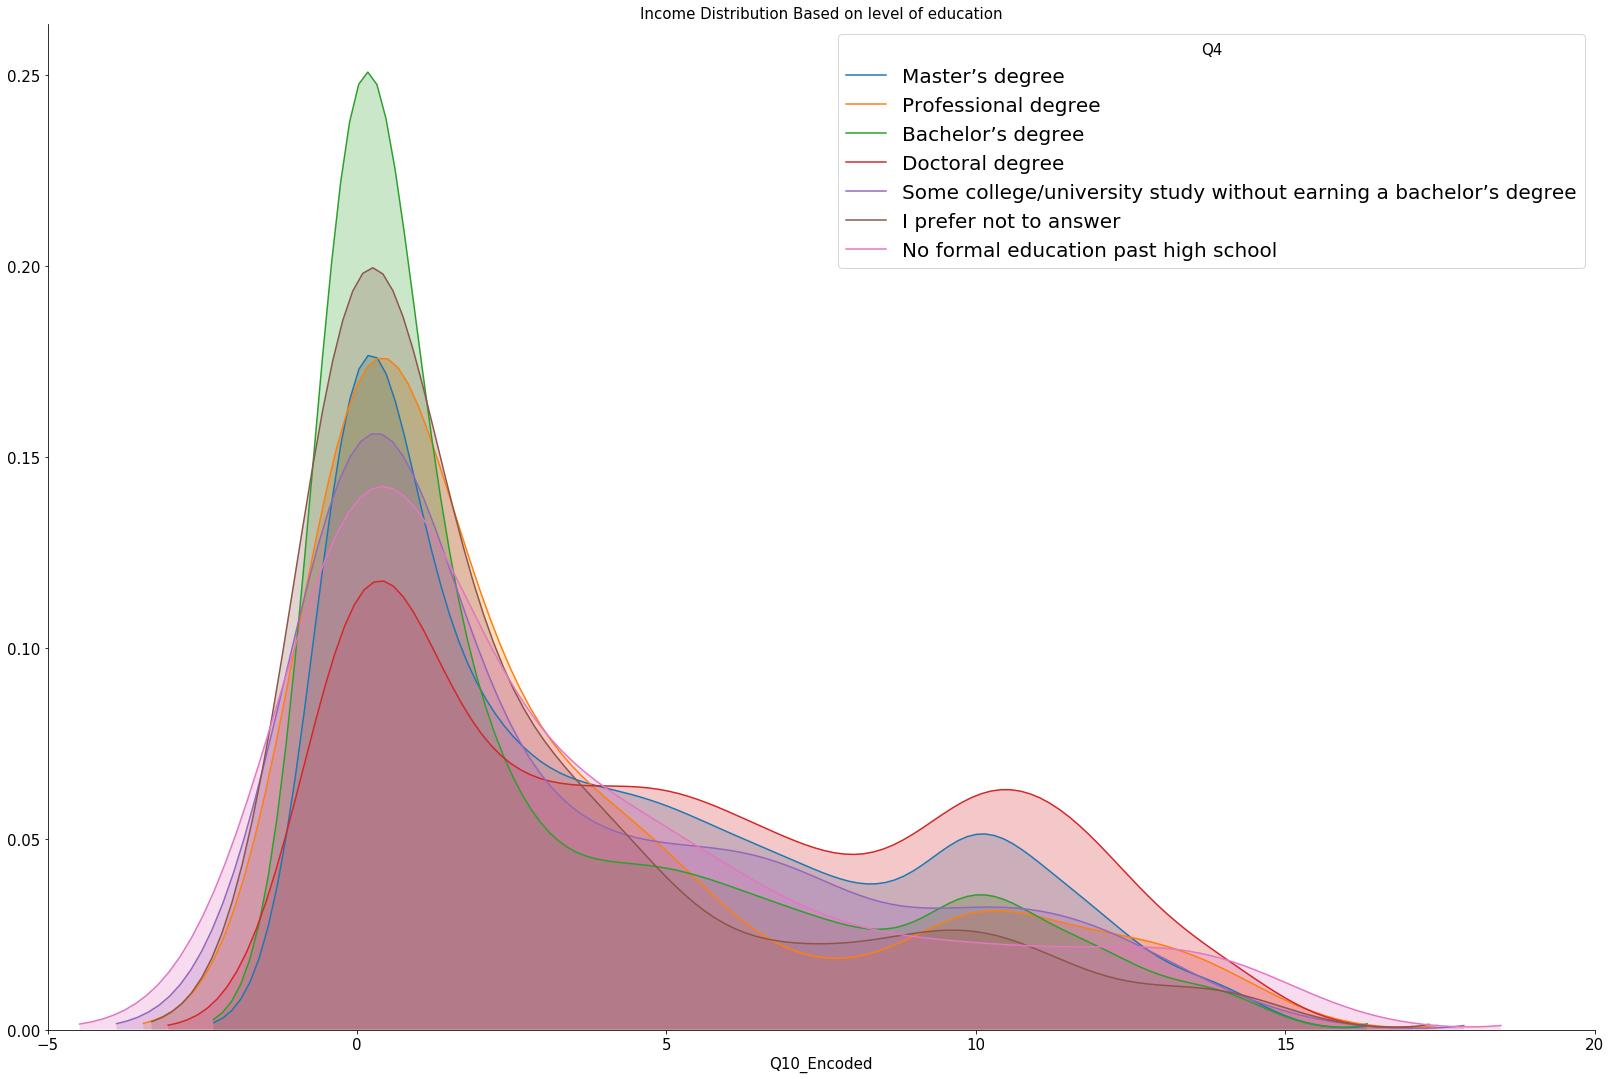

In [167]:
plt.rc('axes', titlesize=15)
plt.rc('font', size=15)
fig = sns.FacetGrid(org_df, hue='Q4', height = 15, aspect = 1.5, legend_out = False)
fig.map(sns.kdeplot, 'Q10_Encoded', shade=True)
fig.set(xlim = (-5, 20))
fig.add_legend(prop={'size': 20})
plt.title('Income Distribution Based on level of education')
plt.show()

This plot shows the approximate distribution of all different levels pf education and it can be seen that at higher salary levels the percentage of people with Masters and higher level degrees like PhD and Professional degree is higher.

In [168]:
# Can also plot in mean salary for each education level and see if it shows the same behaviour
education_lvl = org_df.groupby('Q4').Q10_Encoded.agg(['count', 'mean'])
education_lvl

,count,mean
Q4,,
Bachelor’s degree,3361,3.032431
Doctoral degree,2083,5.153145
I prefer not to answer,184,2.652174
Master’s degree,5868,4.130709
No formal education past high school,125,3.360000
Professional degree,462,3.248918
Some college/university study without earning a bachelor’s degree,414,3.417874


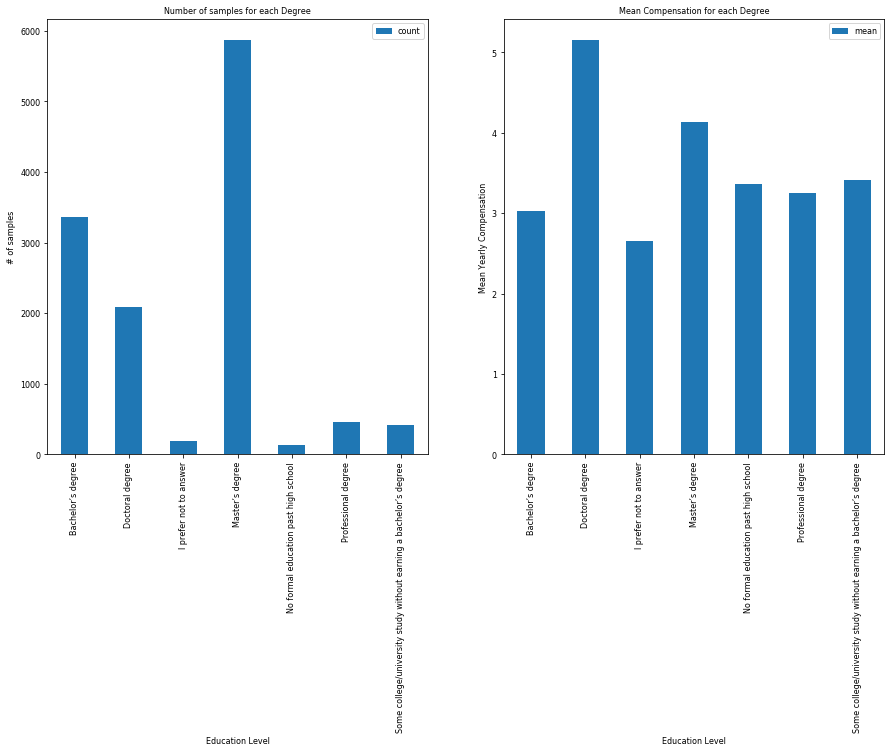

In [169]:
plt.rc('axes', titlesize=8)
plt.rc('font', size=8)
fig, axes = plt.subplots(nrows=1, ncols=2)
fig = education_lvl.plot(y='count',kind='bar',title='Number of samples for each Degree', ax=axes[0], figsize=(15,8))
fig.set_xlabel('Education Level')
fig.set_ylabel('# of samples')
fig = education_lvl.plot(y='mean',kind='bar',title='Mean Compensation for each Degree', ax=axes[1], figsize=(15,8))
fig.set_xlabel('Education Level')
fig.set_ylabel('Mean Yearly Compensation')
plt.show()

It can be seen above that mean salary of the people with a higher level of education is higher than that of people with a lower level of education.


<h2>Q3. Feature Selection</h2>

length of the data-frame 287


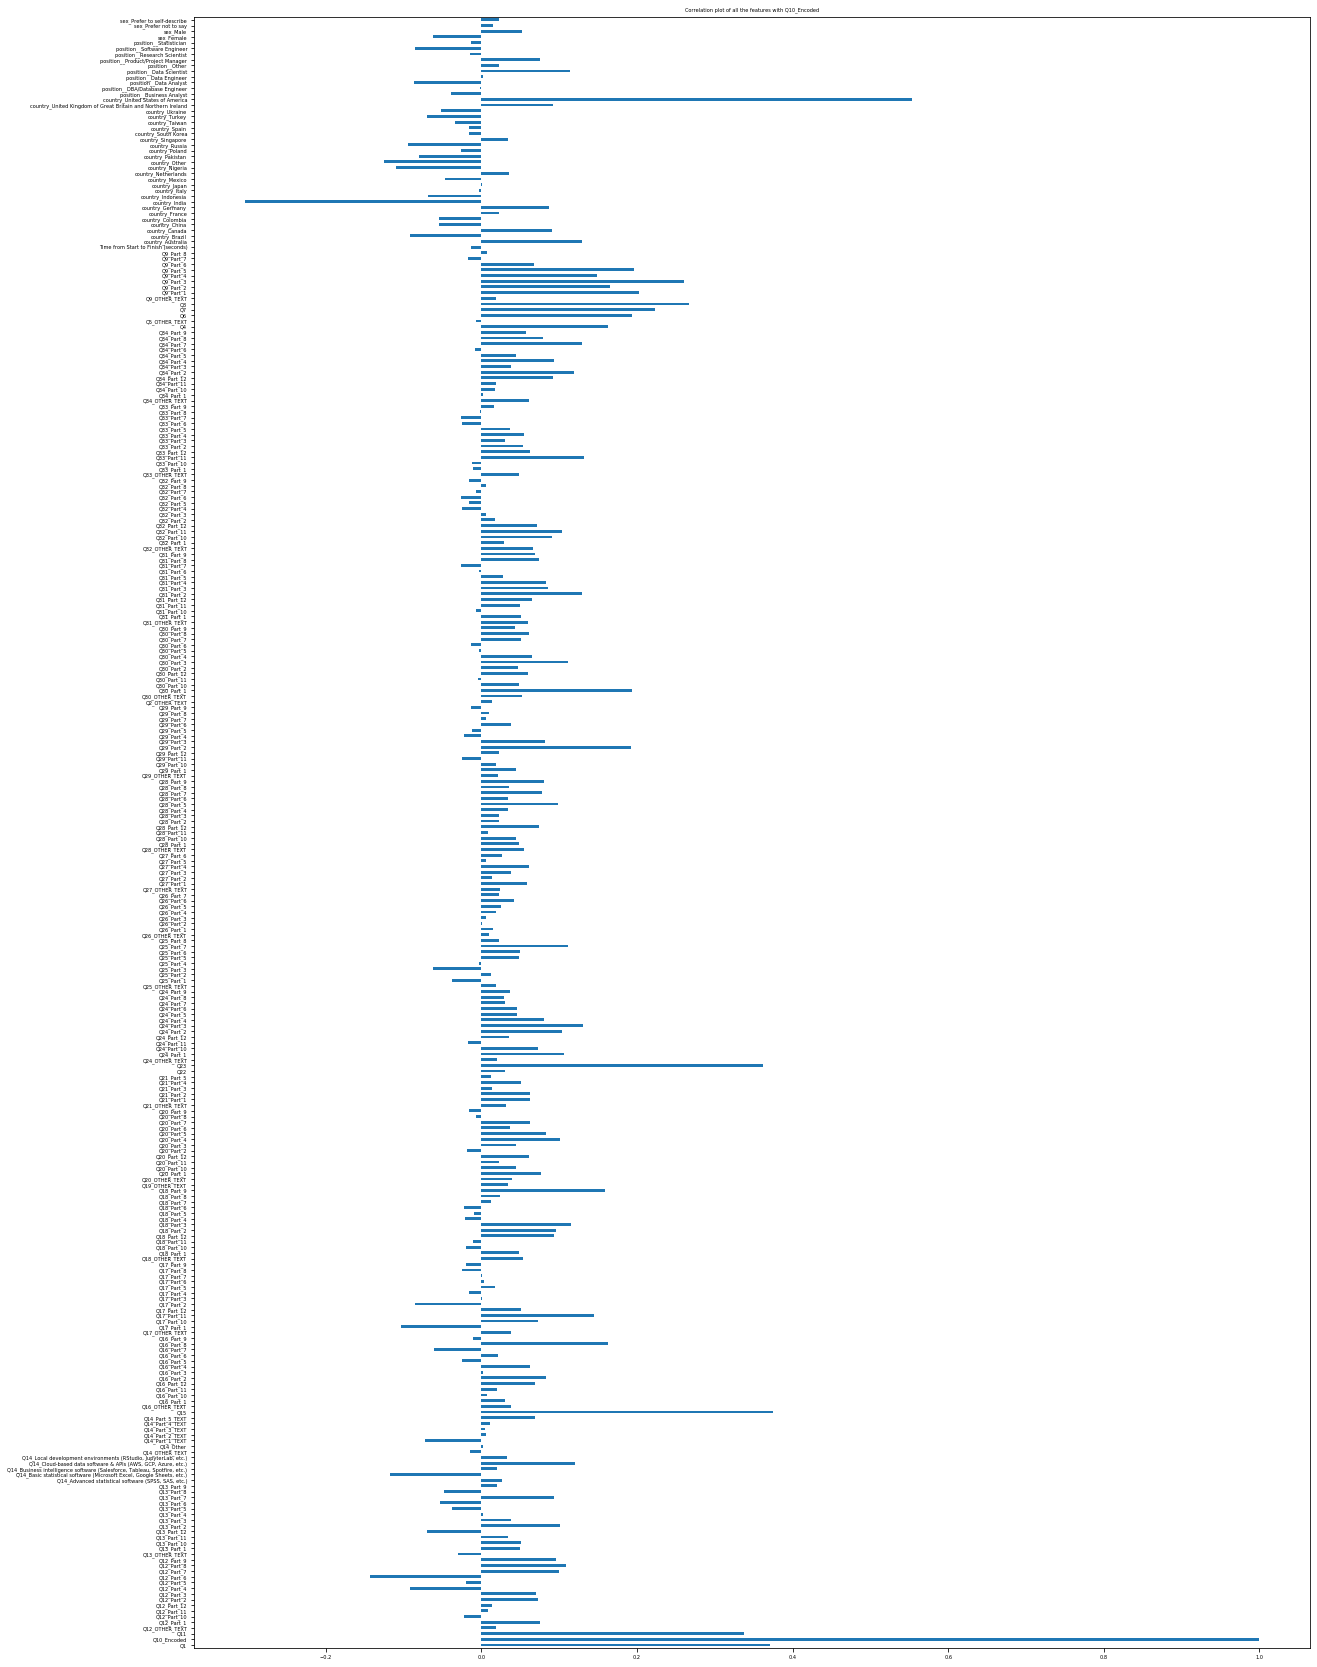

In [170]:
pseudo_df = df.copy(deep=True)
for col in pseudo_df.columns:
    if len(pseudo_df[col].value_counts())==1:
        pseudo_df.drop([col], axis=1,inplace=True)
print('length of the data-frame', (len(list(pseudo_df))))
plt.rc('axes', titlesize=5)
plt.rc('font', size=5)
corr = pseudo_df.corr()
plt.title('Correlation plot of all the features with Q10_Encoded')
(corr.Q10_Encoded.sort_index().plot(kind="barh",figsize=(20,30)))

Using the absolute correlation and then arranging the corrections in order to select top few features of the data-frame.

Text(0, 0.5, 'Absolute correlation with YearlyCompensation')

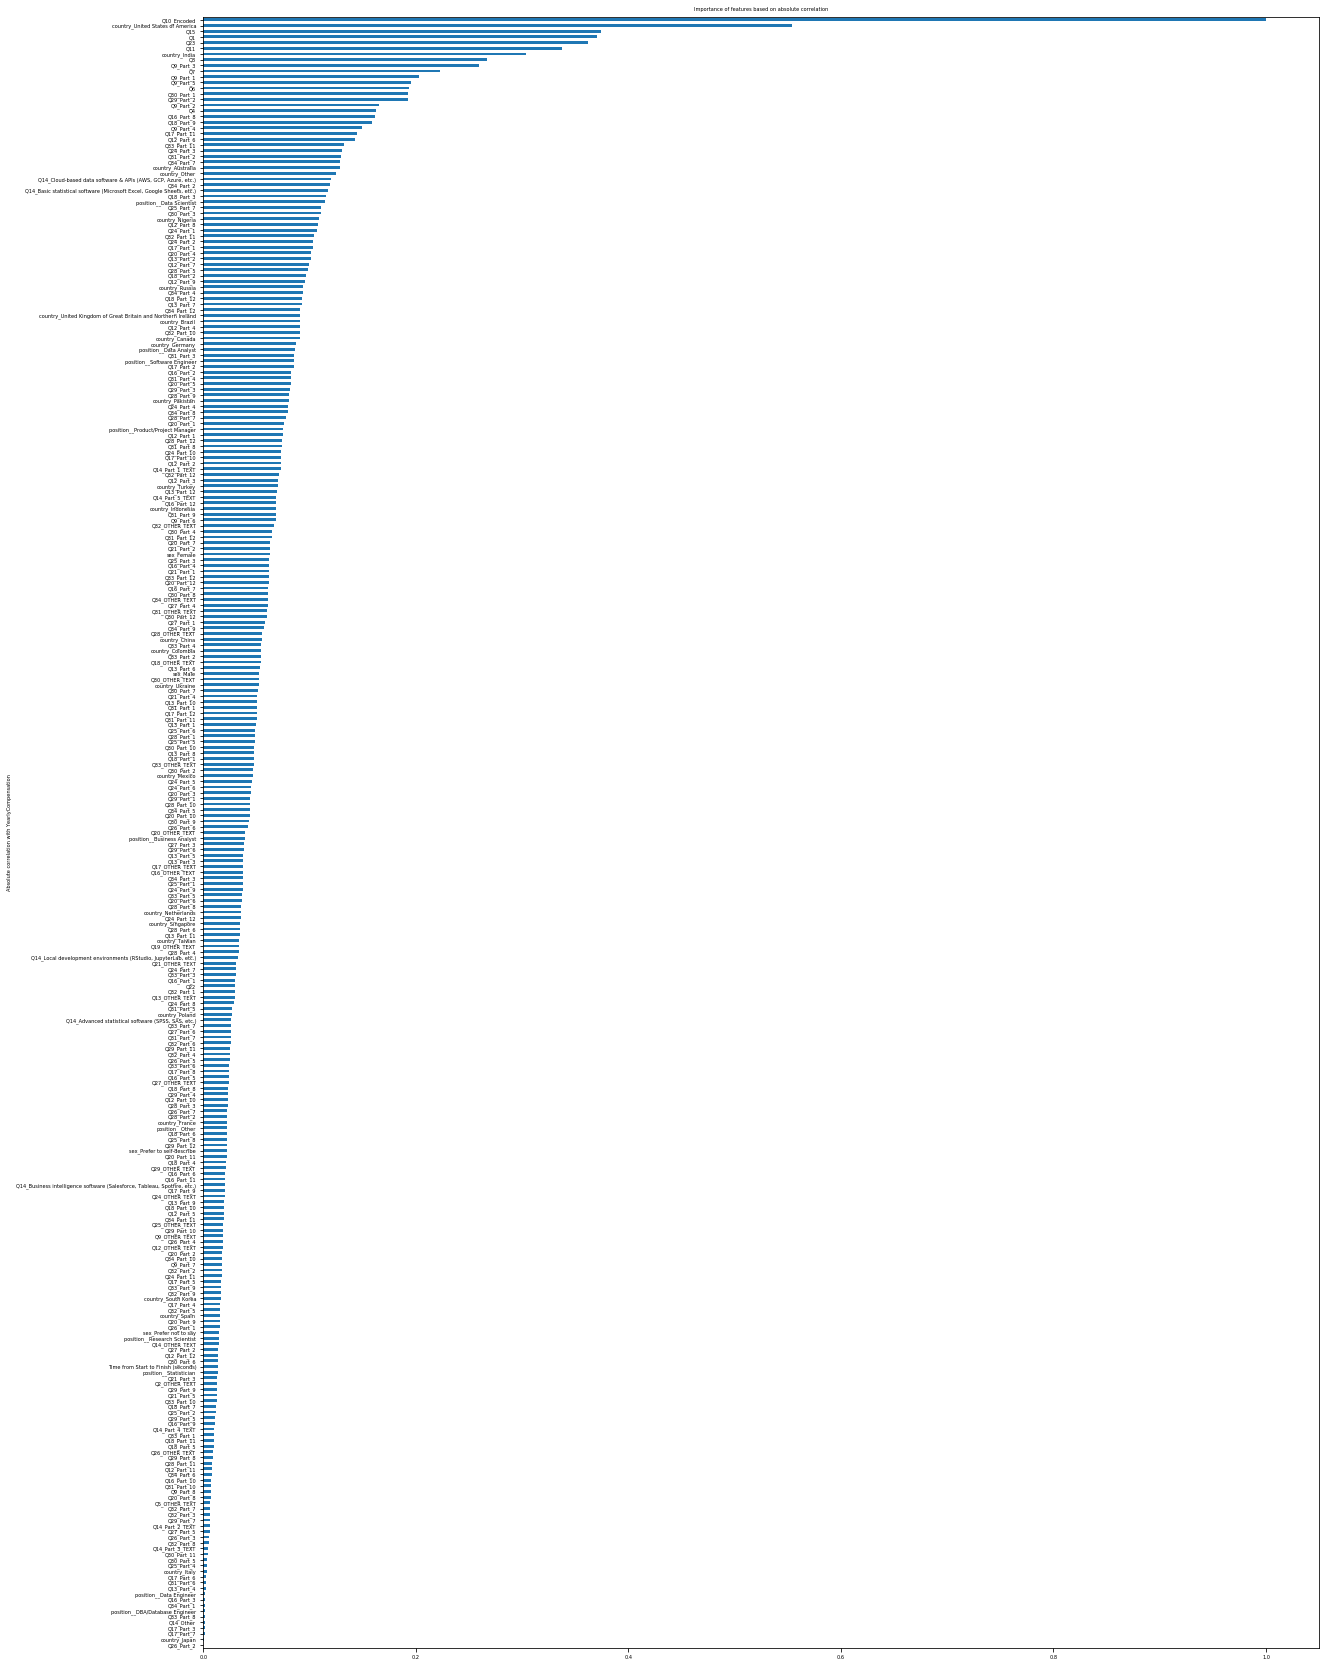

In [171]:
correlation = corr.Q10_Encoded.apply(lambda x: abs(x)).sort_values()
ax = (correlation.plot(kind="barh",figsize=(20,30),title="Importance of features based on absolute correlation"))
ax.set_ylabel('Absolute correlation with YearlyCompensation')

Selecting top 200 features based on correlation measures

In [172]:
#starting by selecting top 200 features
list_of_imp_features = list(correlation.index)[-201:]
list_of_imp_features

['Q20_Part_11',
 'sex_Prefer to self-describe',
 'Q29_Part_12',
 'Q25_Part_8',
 'Q18_Part_6',
 'position__Other',
 'country_France',
 'Q28_Part_2',
 'Q26_Part_7',
 'Q28_Part_3',
 'Q12_Part_10',
 'Q29_Part_4',
 'Q18_Part_8',
 'Q27_OTHER_TEXT',
 'Q16_Part_5',
 'Q17_Part_8',
 'Q33_Part_6',
 'Q26_Part_5',
 'Q32_Part_4',
 'Q29_Part_11',
 'Q32_Part_6',
 'Q31_Part_7',
 'Q27_Part_6',
 'Q33_Part_7',
 'Q14_Advanced statistical software (SPSS, SAS, etc.)',
 'country_Poland',
 'Q31_Part_5',
 'Q24_Part_8',
 'Q13_OTHER_TEXT',
 'Q32_Part_1',
 'Q22',
 'Q16_Part_1',
 'Q33_Part_3',
 'Q24_Part_7',
 'Q21_OTHER_TEXT',
 'Q14_Local development environments (RStudio, JupyterLab, etc.)',
 'Q28_Part_4',
 'Q19_OTHER_TEXT',
 'country_Taiwan',
 'Q13_Part_11',
 'Q28_Part_6',
 'country_Singapore',
 'Q24_Part_12',
 'country_Netherlands',
 'Q28_Part_8',
 'Q20_Part_6',
 'Q33_Part_5',
 'Q24_Part_9',
 'Q25_Part_1',
 'Q34_Part_3',
 'Q16_OTHER_TEXT',
 'Q17_OTHER_TEXT',
 'Q13_Part_3',
 'Q13_Part_5',
 'Q29_Part_6',
 'Q27_Par

In [173]:
#Dropping all the non-important features from the dataframe
overall_list = list(df)
for item in overall_list:
    if(item not in list_of_imp_features):
        df.drop([item], axis=1,inplace=True)
    else:
        continue
print(df.shape)

(12497, 201)


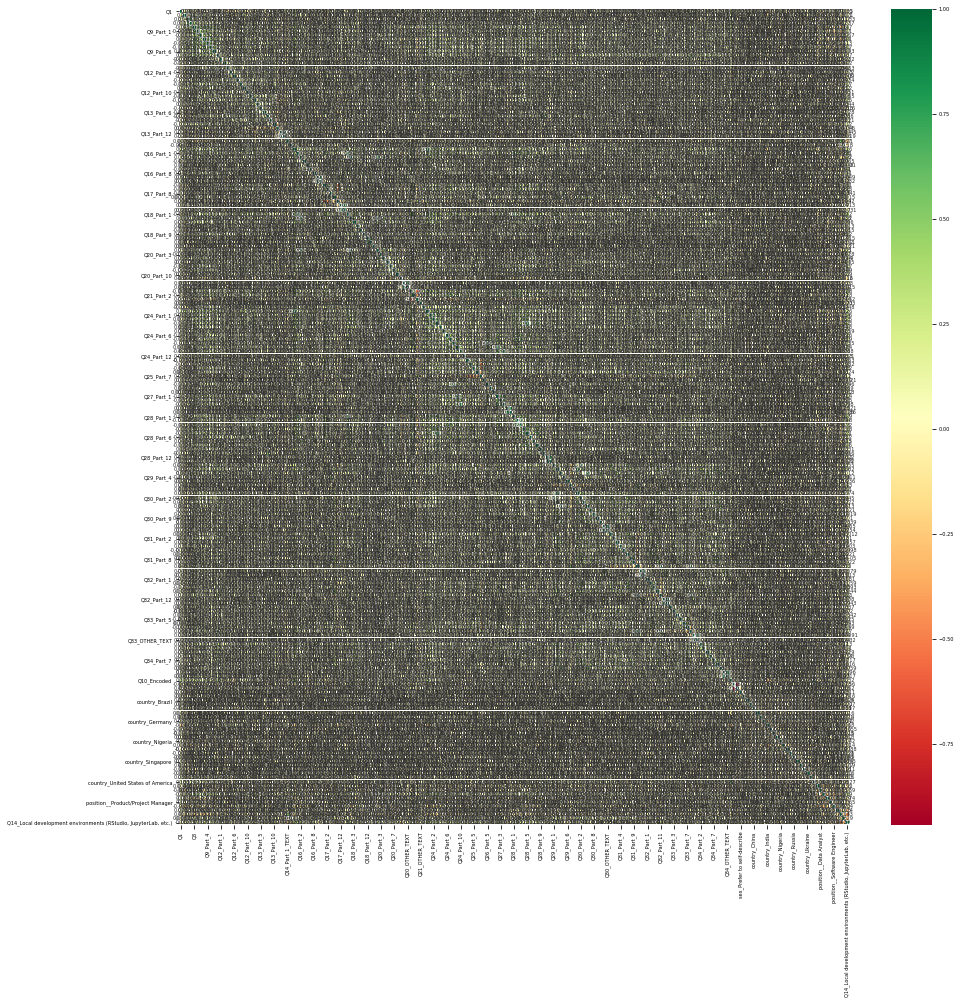

In [174]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.02) #data.corr() gives the correlation matrix
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

<h2>Q4. Model Implementation</h2>

We have ordinal multiclass target therefore to fit a logistic regression model Lorgistic Regression for multiclass regression is implemented.


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, learning_curve

In [0]:
X = df.drop(['Q10_Encoded'],axis=1)
y = df['Q10_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)
#Splitting the data

Text(0.5, 1.0, 'Age Distribtuion in Training and Testing Set')

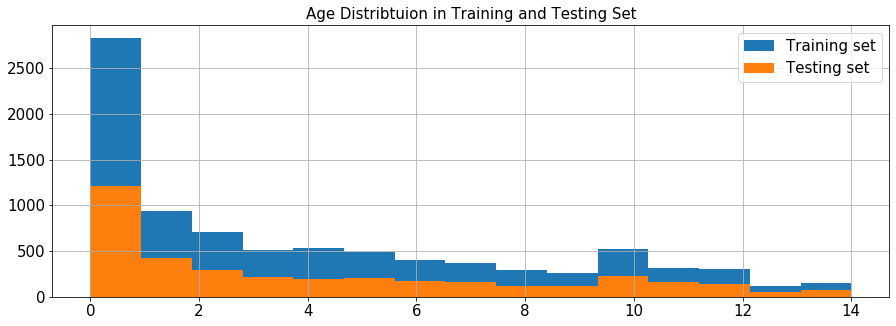

In [243]:
#Class districution in train and test set
plt.rc('axes', titlesize=15)
plt.rc('font', size=15)
fig = plt.figure(figsize=(15,5))
a = y_train.astype(int).hist(bins=15, label = 'Training set')
b = y_test.astype(int).hist(bins=15, label = 'Testing set')
plt.legend()
plt.title('Age Distribtuion in Training and Testing Set')

The problem in hand is in between regression and classification and I need to use ordinal classification approach using logistic regression.

In [0]:
def fit_models(classes, X, Y, hps):
  models = []

  for salary_bucket in classes:
      model = LogisticRegression(penalty = hps['pen'], C = hps['c'], solver = hps['sol'], max_iter = hps['max_iter'], verbose = 0)
      target = np.ones((len(y_train),))
      count = 0
      for i in y_train:
          if i <= salary_bucket:
              target[count] = 0
          count += 1
      #Target corresponds to binary ordinal form of classification
      models.append(model.fit(X_train, target))
      #Getting a list of logistic regression models for ordinal classification of 0-else, 0or1-else, 0,1or2-else ... type
  return models

In [0]:
def prediction_probs(models, X):
    prob_predictions = []
    #Getting the probability of a point being in any of the 14 classses
    for model in models:
        pred = model.predict_proba(X)
        idx = 0
        for cls in model.classes_:
            if cls == 1:
                prob_predictions.append(pred[:, idx])
            idx += 1

    prob_predictions = np.asarray(prob_predictions)
    shp = prob_predictions.shape
    p_15 = np.zeros((1, shp[1]))
    prob_predictions = np.vstack([prob_predictions, p_15])

    prob = np.zeros((prob_predictions.shape))
    for i in range(0, len(prob_predictions)):
        if(i == 0):
            prob[i, :] = 1 - prob_predictions[i, :]
        else:
            prob[i, :] = prob_predictions[(i-1), :] - prob_predictions[i, :]

    return prob, prob_predictions #return prediction (# of observations, # of class)

In [0]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] #, 14] going till the last second category
#Fitting the models

#Choosing a random set of hyper-parameters
hps = {'pen': 'l2', 'c': 0.5, 'sol':'newton-cg', 'max_iter': 100}
models = fit_models(classes, X_train, y_train, hps)

pred_p, t_p_pred = prediction_probs(models, X_train)

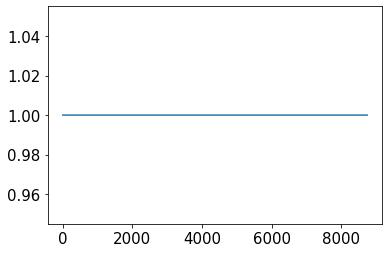

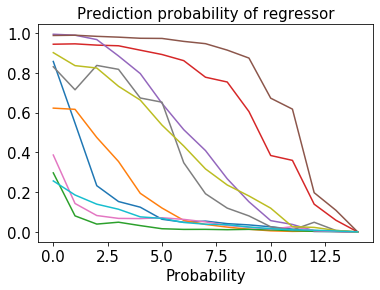

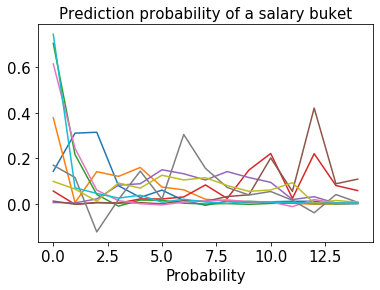

In [247]:
#Probability sums to one and total prediction probability goes to zero 
#Just checking the probabilities total sum
plt.plot(pred_p.sum(axis=0))
plt.show()

for i in range(0, 10):
    plt.plot(t_p_pred[:,i])
    plt.title('Prediction probability of regressor')
    plt.xlabel('regressor #')
    plt.xlabel('Probability')
plt.show()

for i in range(0, 10):
    plt.plot(pred_p[:,i])
    plt.title('Prediction probability of a salary buket')
    plt.xlabel('salary bucket')
    plt.xlabel('Probability')
plt.show()


This plot shows that there are sudden bumps in the total prediction probability whereas the t_p_pred should only be deacreasing otherwise we get a negative prediction probability. The reason for this can be the models are not a good fit for the data right now.

Training Accuracy of the model is 42.60%


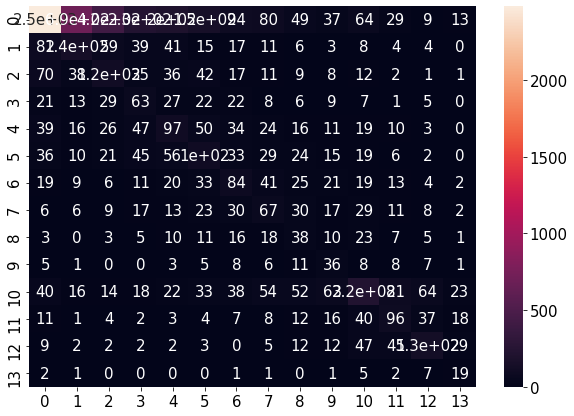

In [249]:
#Checking the training and testing error without tuning anything in the model first
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler
#Converting the probabilities to predictions
y_pred = pred_p.argmax(axis=0)

#Plotting confusion matrix
cm = confusion_matrix(y_pred, y_train, labels =classes)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

print('Training Accuracy of the model is %.2f%%' % (accuracy_score(y_pred, y_train)*100))

The accuracy for the model is 42% and the confusion matrix looks swollen on the diagonal which is what is needed we now attempt to enhance the model prediction by hyperparameter tuning.

Before doing anything I need to cross-validate the model

In [210]:
#Cross validating the original model
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
kfolds = KFold(n_splits = 10)
kfolds.get_n_splits(X_train)
accuracy = np.zeros(10)
np_idx = 0

#original model
hps = {'pen':'l2', 'sol':'newton-cg', 'c': 0.5, 'max_iter':100}
for train_idx, test_idx in kfolds.split(X_train):
  x_t, x_te = X_train.values[train_idx], X_train.values[test_idx]
  y_t, y_te = y_train.values[train_idx], y_train.values[test_idx]

  x_t = scalar.fit_transform(x_t)
  x_te = scalar.fit_transform(x_te)

  models = fit_models(classes, x_t, y_t, hps)

  pred_prob, t_P = prediction_probs(models, x_te)
  predictions = pred_prob.argmax(axis=0)
  correct_pred = 0
  for i in range(0, len(predictions)):
    if(predictions[i] == y_te[i]):
      correct_pred += 1

  accuracy[np_idx] = correct_pred/len(predictions)*100
  print('Fold: {}, Accuracy: {}%'.format(np_idx+1, accuracy[np_idx]))
  np_idx += 1

print('Average accuracy for {} penalty with c = {} is {}({})'.format('l2', 0.5, round(np.mean(accuracy),3), round(np.std(accuracy),3)))

Fold: 1, Accuracy: 35.42857142857142%
Fold: 2, Accuracy: 35.77142857142857%
Fold: 3, Accuracy: 37.371428571428574%
Fold: 4, Accuracy: 37.714285714285715%
Fold: 5, Accuracy: 33.6%
Fold: 6, Accuracy: 35.199999999999996%
Fold: 7, Accuracy: 38.628571428571426%
Fold: 8, Accuracy: 35.92677345537758%
Fold: 9, Accuracy: 34.55377574370709%
Fold: 10, Accuracy: 35.58352402745996%
Average accuracy for l2 penalty with c = 0.5 is 35.978(1.441)


Average 10-fold accuracy for the selected parameter list is 35.978% with 1.441 standard deviation

In [211]:
accuracy = np.zeros(10)
np_idx = 0
#Another model
hps = {'pen':'l2', 'sol':'newton-cg', 'c': 0.01, 'max_iter':100}
for train_idx, test_idx in kfolds.split(X_train):
  x_t, x_te = X_train.values[train_idx], X_train.values[test_idx]
  y_t, y_te = y_train.values[train_idx], y_train.values[test_idx]

  x_t = scalar.fit_transform(x_t)
  x_te = scalar.fit_transform(x_te)
  models = fit_models(classes, x_t, y_t, hps)

  pred_prob, t_P = prediction_probs(models, x_te)
  predictions = pred_prob.argmax(axis=0)
  correct_pred = 0
  for i in range(0, len(predictions)):
    if(predictions[i] == y_te[i]):
      correct_pred += 1

  accuracy[np_idx] = correct_pred/len(predictions)*100
  print('Fold: {}, Accuracy: {}%'.format(np_idx, accuracy[np_idx]))
  np_idx += 1

print('Average accuracy for {} penalty with c = {} is {}({})'.format('l2', 0.1, round(np.mean(accuracy),3), round(np.std(accuracy),3)))

Fold: 0, Accuracy: 37.25714285714285%
Fold: 1, Accuracy: 37.6%
Fold: 2, Accuracy: 38.05714285714286%
Fold: 3, Accuracy: 38.857142857142854%
Fold: 4, Accuracy: 34.97142857142857%
Fold: 5, Accuracy: 35.885714285714286%
Fold: 6, Accuracy: 39.77142857142857%
Fold: 7, Accuracy: 37.52860411899314%
Fold: 8, Accuracy: 36.04118993135012%
Fold: 9, Accuracy: 37.52860411899314%
Average accuracy for l2 penalty with c = 0.1 is 37.35(1.352)


Avg accuracy of model 2 is 37.35% with 1.352 standard deviation.

As the reguarization increases (c deacreases) the model slowly goes to underfitting the dataset but the standard deviation will be smaller than the previous model std because an under-fit model will typically generalize better. But it can be seen that the training accuracy for the model used before is more than this avergae which shows that increasing regualrization can tend to underfit data.

In [0]:
accuracy = np.zeros(10)
np_idx = 0
#Another model
hps = {'pen':'none', 'sol':'newton-cg', 'c': 1, 'max_iter':100}
for train_idx, test_idx in kfolds.split(X_train):
  x_t, x_te = X_train.values[train_idx], X_train.values[test_idx]
  y_t, y_te = y_train.values[train_idx], y_train.values[test_idx]

  x_t = scalar.fit_transform(x_t)
  x_te = scalar.fit_transform(x_te)
  models = fit_models(classes, x_t, y_t, hps)

  pred_prob, t_P = prediction_probs(models, x_te)
  predictions = pred_prob.argmax(axis=0)
  correct_pred = 0
  for i in range(0, len(predictions)):
    if(predictions[i] == y_te[i]):
      correct_pred += 1

  accuracy[np_idx] = correct_pred/len(predictions)*100
  print('Fold: {}, Accuracy: {}%'.format(np_idx, accuracy[np_idx]))
  np_idx += 1
  
print('Average accuracy for {} penalty with c = {} is {}({})'.format('l2', 0.1, round(np.mean(accuracy),3), round(np.mean(accuracy),3)))

The dataset has 200 features and having no regualizer will in general overfit the dataset and not generalize giving a high stand-derivation and accuracy. The accuracy is still 33% in 35% region which makes the final solution more acceptable. 

<h2>Q5. Model Tuning</h2

Using grid-search on hyperparameter c and solver to pick the best model.

<h3> Grid Search</h3>

In [0]:
scalar = StandardScaler()
kfolds = KFold(n_splits = 10)
kfolds.get_n_splits(X_train)

best_params = {}
best_accuracy = 0
best_std = 0
ACC = []
STD = []
for c in [0.01, 0.05, 0.1, 0.2, 0.5]:
  for solver in ['newton-cg','lbfgs','liblinear','sag']:
    accuracy = np.zeros(10)
    np_idx = 0
    hps = {'pen' : 'l2', 'sol': solver, 'c': c, 'max_iter': 100}
    print('\n c = {}, solver = {}\n'.format(hps['c'], hps['sol']))
    for train_idx, test_idx in kfolds.split(X_train):
      x_t, x_te = X_train.values[train_idx], X_train.values[test_idx]
      y_t, y_te = y_train.values[train_idx], y_train.values[test_idx]

      models = fit_models(classes, x_t, y_t, hps)

      pred_prob, t_P = prediction_probs(models, x_te)
      predictions = pred_prob.argmax(axis=0)
      correct_pred = 0
      for i in range(0, len(predictions)):
        if(predictions[i] == y_te[i]):
          correct_pred += 1
      accuracy[np_idx] = correct_pred/len(predictions)*100
      print('Fold: {}, Accuracy: {}%'.format(np_idx, accuracy[np_idx]))
      np_idx += 1
    
    if np.mean(accuracy) > best_accuracy:
        best_params = {'sol': solver, 'C': c}
        best_accuracy = np.mean(accuracy)
        best_std = np.std(accuracy)
    print ("Average Accuracy for {} solver, {} penalty with C = {} : {}%({}%)".format(solver, 'L2', c, round(np.mean(accuracy),3),round(np.std(accuracy),3)))
    if(method == 'newton-cg'):
        ACC.append(round(np.mean(accuracy),3))
        STD.append(round(np.std(accuracy),3))

Best hyerparameters from this grid-search turn out to be: 
 Solver: newton-cg with L2 regularization and C = 0.5 
 10-folds cross-validation score for this model is: 42.597254004576655(1.7381824779081427)


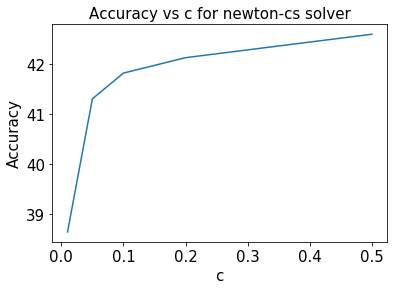

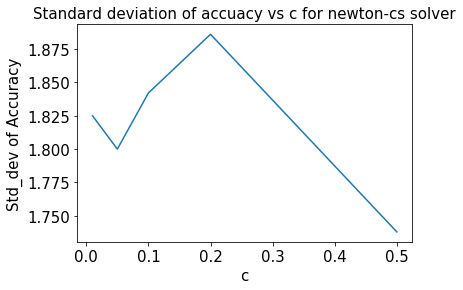

In [225]:
print('Best hyerparameters from this grid-search turn out to be: \n Solver: {} with L2 regularization and C = {} \n 10-folds cross-validation score for this model is: {}({})'.format(best_params['sol'], best_params['C'], best_accuracy, best_std))

x = [0.01, 0.05, 0.1, 0.2, 0.5]
plt.plot(x, ACC)
plt.title('Accuracy vs c for newton-cs solver')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.show()

plt.plot(x, STD)
plt.title('Standard deviation of accuacy vs c for newton-cs solver')
plt.xlabel('c')
plt.ylabel('Std_dev of Accuracy')
plt.show()

The claim above is justified as it can be seen that as c increases (regularization deacreases) the accuracy increases and as c increases the standard deviation deacreases.

In [0]:
#Finally using the selected parameters
hps = {'pen': 'l2', 'sol': best_params['sol'], 'c': best_params['C'], 'max_iter': 100}
models = fit_models(classes, X_train, y_train, hps)

pred_p, t_p_pred = prediction_probs(models, X_train) 

[[2482  692  421  226  197  153   94   80   49   37   64   29    9   13]
 [  82  136   59   39   41   15   17   11    6    3    8    4    4    0]
 [  70   38  116   35   36   42   17   11    9    8   12    2    1    1]
 [  21   13   29   63   27   22   22    8    6    9    7    1    5    0]
 [  39   16   26   47   97   50   34   24   16   11   19   10    3    0]
 [  36   10   21   45   56  100   33   29   24   15   19    6    2    0]
 [  19    9    6   11   20   33   84   41   25   21   19   13    4    2]
 [   6    6    9   17   13   23   30   67   30   17   29   11    8    2]
 [   3    0    3    5   10   11   16   18   38   10   23    7    5    1]
 [   5    1    0    0    3    5    8    6   11   36    8    8    7    1]
 [  40   16   14   18   22   33   38   54   52   63  221   81   64   23]
 [  11    1    4    2    3    4    7    8   12   16   40   96   37   18]
 [   9    2    2    2    2    3    0    5   12   12   47   45  132   29]
 [   2    1    0    0    0    0    1    1    0    1

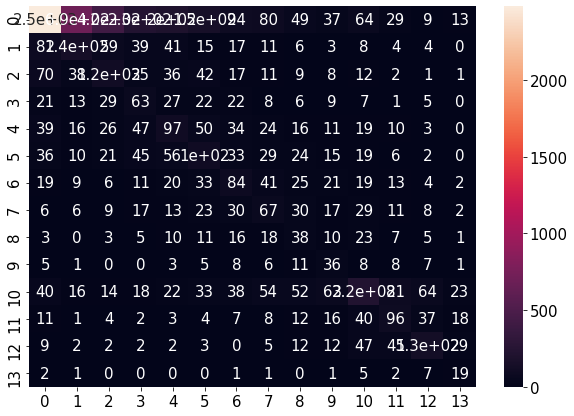

In [231]:
#Training Accuracy of the model 
y_pred = pred_p.argmax(axis=0)

#Plotting confusion matrix
cm = confusion_matrix(y_pred, y_train, labels =classes)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

print('Training Accuracy of the model is %.2f%%' % (accuracy_score(y_pred, y_train)*100))

<h2>Q6. Testing and Discussion</h2>

Finally using the test dataset to check the accuracy of the selected model.

Training Accuracy of the model is 35.839999999999996


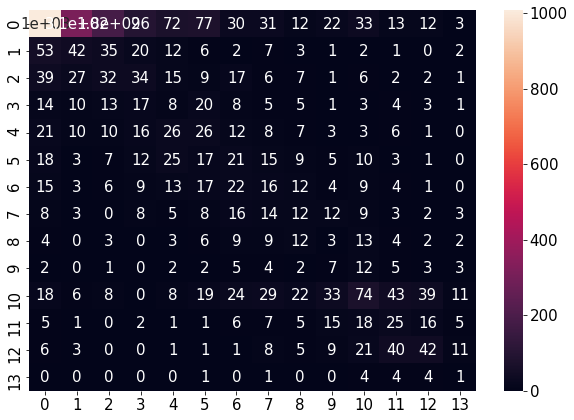

In [238]:
#Testing the model
pred_p, t_p_pred = prediction_probs(models, X_test)
y_pred = pred_p.argmax(axis=0)

#Plotting confusion matrix
cm = confusion_matrix(y_pred, y_test, labels =classes)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

print('Training Accuracy of the model is {}'.format(accuracy_score(y_pred, y_test)*100))

The model has decent accuracy given the simplicity of the model used for multiclass classification. This approach is different from a normal linear multiclass classification since the tries to use ordinal information of the classes.